In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Clustering

Now that we can measure whether two samples are similar or different, we can begin to look at clustering.  There are two main families of clustering method:
  
- Partitional Algorithms
- Hierarchical Algorithms



In [3]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
# drop the name so that we just have the numerical columns
autompgN = autompg.drop('name', axis=1)
# subtract the mean, divide by the standard deviation
autompg_norm = (autompgN-autompgN.mean())/autompgN.std()


Clustering is an example of *unsupervised learning*.  Compared with linear/logistic regression (which
are *supervised*) - to train those models we need to provide the true category labels to the training algorithm so that it can learn how to categorise the data. 

Clustering can be used in cases where regression cannot.  If we don't have any true labels
for the data, we can still use clustering to see if there are any natural groups in the data.  This can 
be a really useful data exploration technique.

## Partitional algorithms

Start with a random partition (split) of the data and try to refine it iteratively so that the partitions are better.  They usually require that you nominate a fixed number of clusters to look for.


## Hierarchical algorithms

Organise the data into hierarchical (tree-like) structures where the most similar samples are grouped together, then similar groups are joined etc.   This might be done **bottom-up** or **top-down**.  The end result is a tree-like structure and these methods can be used when you don't know how many clusters there should be in the data.


### KMeans Clustering

The basic algorithm is:

1. start with K randomly placed cluster centroids
2. for each data point, assign it to the closest cluster centroid
3. re-estimate the cluster centroids for each cluster based on the data points that belong to it
4. if the centroid estimate has not changed significantly, stop, otherwise repeat from step 2.

Here's an interactive [demo](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

See the text (Section 7.2.3.1) for a detailed discussion.   


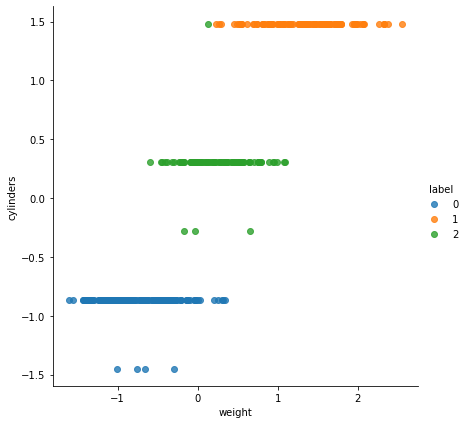

In [5]:
from sklearn.cluster import KMeans
# work on a copy of just a couple of variables
df = autompg_norm[['weight', 'cylinders']].copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
df['label'] = kmeans.predict(df) 
_p = sns.lmplot("weight", "cylinders", data=df, fit_reg=False, hue='label', height=6)

In [9]:
# what are the clusters? 
autompg[ df['label'] == 2][['name', 'weight', 'cylinders']].head()

,name,weight,cylinders
13,buick estate wagon (sw),3086.0,8
15,plymouth duster,2833.0,6
16,amc hornet,2774.0,6
17,ford maverick,2587.0,6
24,amc gremlin,2648.0,6


## KMeans Clustering

- Need to define the number of clusters 
- Initial cluster centriods are arbitrary
  - choose K random points within the distribution
  - choose K data points
  - choose K data points that are maximally distinct
- Choice of centriods can affect the outcome
- There are variations on KMeans that give improved outcomes in some problems